# If a Tree Falls in a Forest Challenge
___
The [Adult Data Set](http://archive.ics.uci.edu/ml/datasets/Adult) contains census information and about adults in the United States and whether or not they make more or less than $50K per year. It was donated by Ronny Kohavi and Barry Becker to the UCI Machine Learning Repository.



In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import seaborn as sns



%matplotlib inline

In [3]:
df = pd.read_csv('adult.csv', header=None)

In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native-country', 'over_50K']

In [5]:
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native-country,over_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native-country    32561 non-null object
over_50K          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


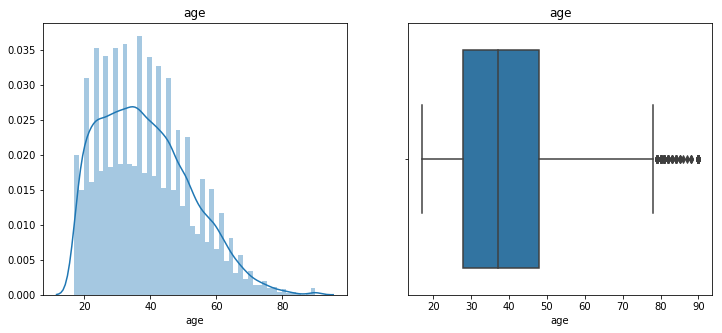

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['age'])
plt.title('age')

plt.subplot(1, 2, 2)
sns.boxplot(df['age'])
plt.title('age')

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


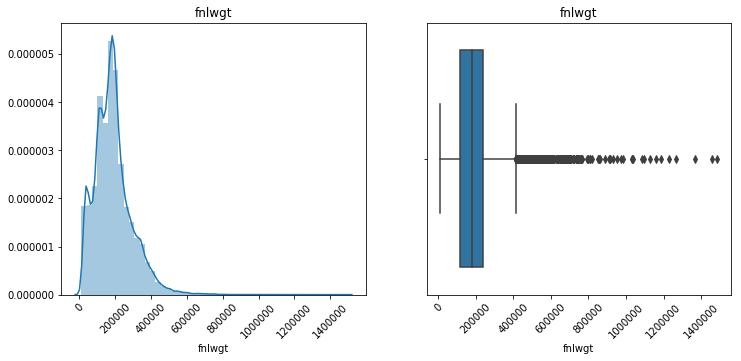

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['fnlwgt'])
plt.title('fnlwgt')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(df['fnlwgt'])
plt.title('fnlwgt')
plt.xticks(rotation=45)

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


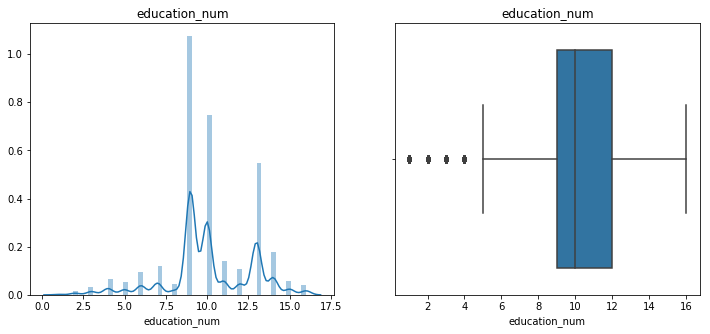

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['education_num'])
plt.title('education_num')

plt.subplot(1, 2, 2)
sns.boxplot(df['education_num'])
plt.title('education_num')

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


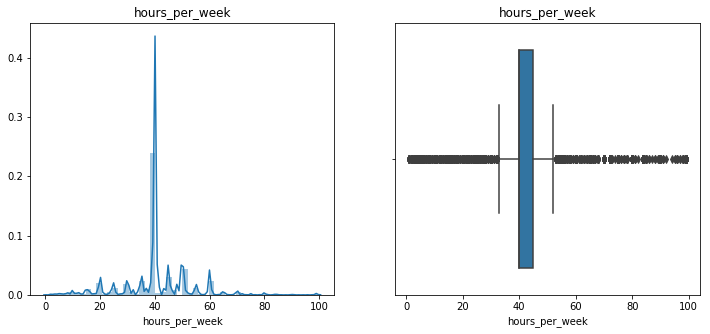

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['hours_per_week'])
plt.title('hours_per_week')

plt.subplot(1, 2, 2)
sns.boxplot(df['hours_per_week'])
plt.title('hours_per_week')

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


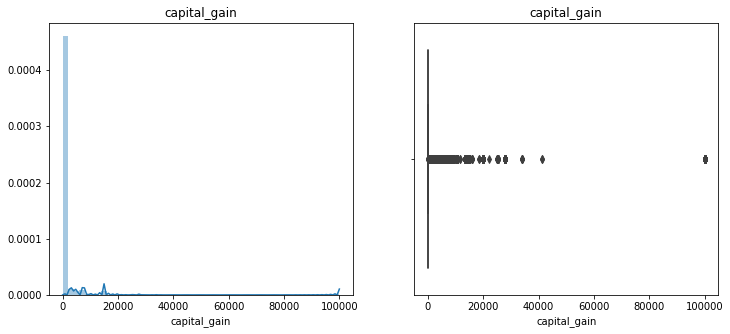

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['capital_gain'])
plt.title('capital_gain')

plt.subplot(1, 2, 2)
sns.boxplot(df['capital_gain'])
plt.title('capital_gain')

plt.show()

C:\Users\Loren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


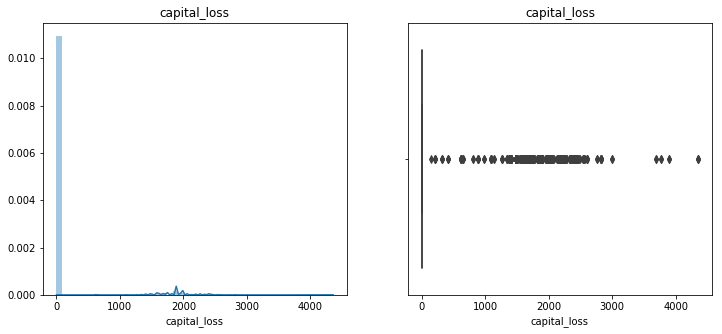

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['capital_loss'])
plt.title('capital_loss')

plt.subplot(1, 2, 2)
sns.boxplot(df['capital_loss'])
plt.title('capital_loss')

plt.show()

In [6]:
# Look at unique values for object columns
objects_cols = df.select_dtypes(include=[object]).columns
for i in objects_cols:
    print(i, len(df[i].unique()))

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42
over_50K 2


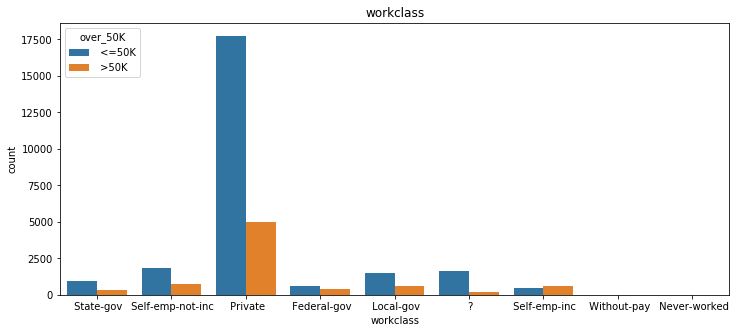

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x="workclass", data=df, hue="over_50K")
plt.title('workclass')
plt.show()

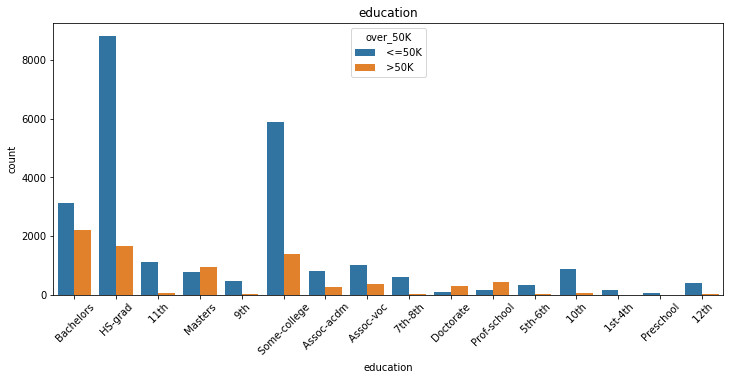

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x="education", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('education')
plt.show()

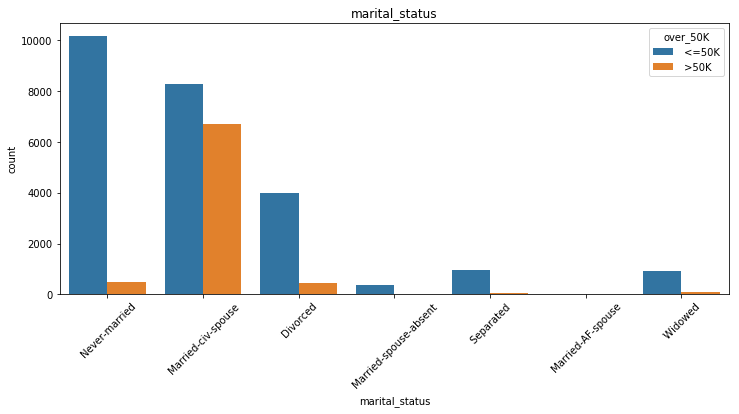

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x="marital_status", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('marital_status')

plt.show()

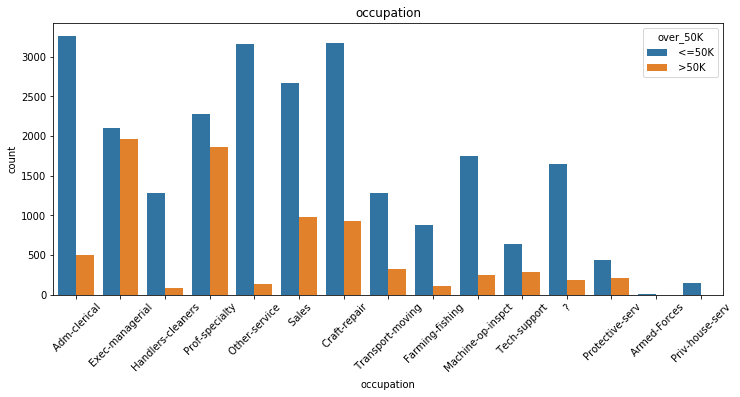

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x="occupation", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('occupation')

plt.show()

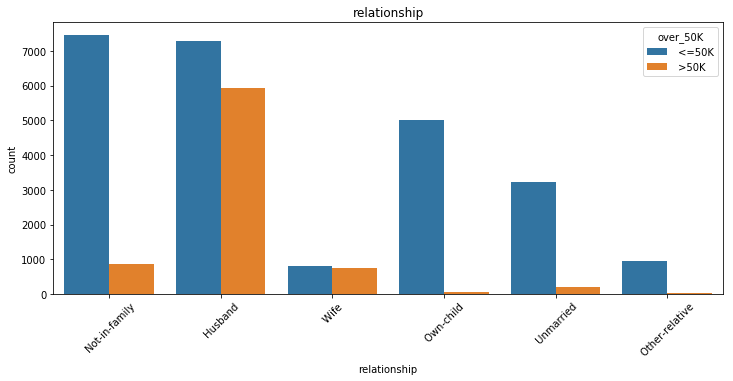

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x="relationship", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('relationship')

plt.show()

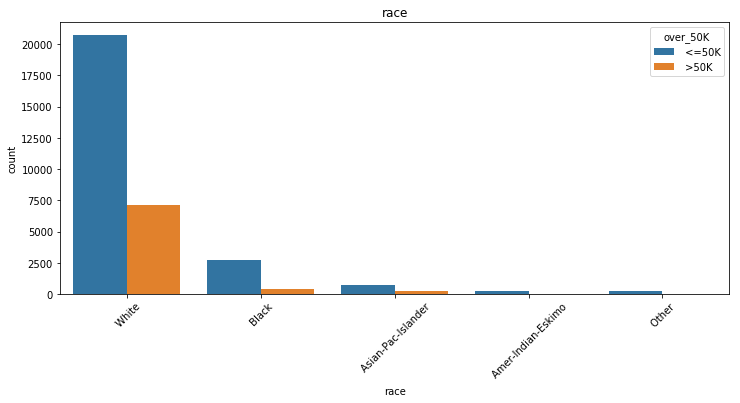

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x="race", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('race')


plt.show()

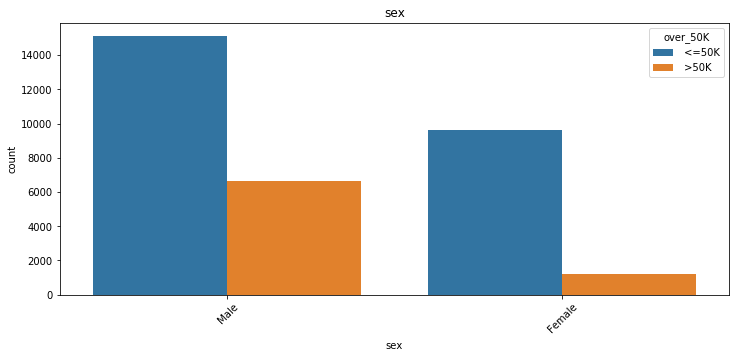

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x="sex", data=df, hue="over_50K");
plt.xticks(rotation=45)
plt.title('sex')

plt.show()

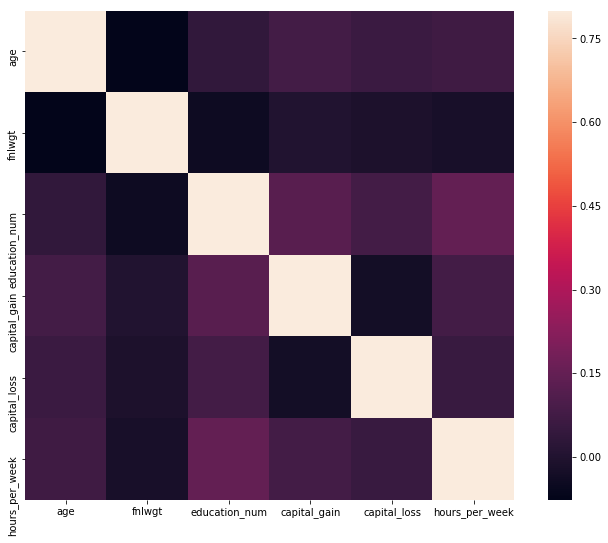

In [7]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [39]:
df['over_50K'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [40]:
# find benchmark
print(df['over_50K'].value_counts())
len(df[df['over_50K'] == ' <=50K']) / len(df)

 <=50K    24720
 >50K      7841
Name: over_50K, dtype: int64


0.7591904425539756

### Benchmark of .759

In [41]:
features = df.drop(['over_50K'], axis=1)
features = pd.get_dummies(features)

over_50K = np.where(df['over_50K'] == ' >50K', 1, 0) 

# Decision Tree

In [46]:
mx_features = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=i)
    decision_tree.fit(features, over_50K)
    mean_score = cross_val_score(decision_tree, features, over_50K, cv=10).mean()
    mx_features.append([i, mean_score])

mx_features = pd.DataFrame(mx_features)

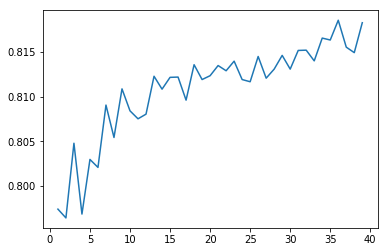

In [47]:
mx_features.columns = ['max_features', 'score']
plt.plot(mx_features.max_features, mx_features.score)

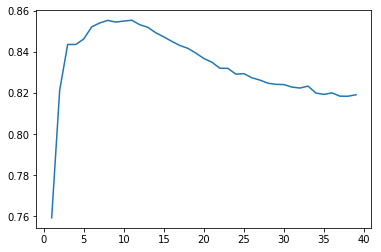

In [54]:
mx_depth = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(features, over_50K)
    mean_score = cross_val_score(decision_tree, features, over_50K, cv=10).mean()
    mx_depth.append([i, mean_score])

mx_depth = pd.DataFrame(mx_depth)
mx_depth.columns = ['max_depth', 'score']
plt.plot(mx_depth.max_depth, mx_depth.score)

In [55]:
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
#import pydotplus
#import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=None,
    max_depth=8,
)
decision_tree.fit(features, over_50K)
# Render our tree.
#dot_data = tree.export_graphviz(
#    decision_tree, out_file=None,
#    feature_names=features.columns,
#    class_names=['Over_50K', 'Under_50K'],
#    filled=True
#)
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
decision_tree.score(features, over_50K)

0.8598323147323486

In [57]:
#cross validation

cross_val_score(decision_tree, features, over_50K, cv=10)

array([0.84494934, 0.85626536, 0.85995086, 0.84459459, 0.85718673,
       0.85718673, 0.85626536, 0.86210074, 0.86087224, 0.85534398])

# Random Forest

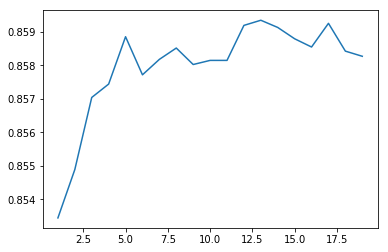

In [59]:
n_trees = []
for i in range(1, 20):
    rfc = ensemble.RandomForestClassifier(max_depth=8, max_features=None, n_estimators=i)
    mean_score = cross_val_score(rfc, features, over_50K, cv=10).mean()
    n_trees.append([i, mean_score])

n_trees = pd.DataFrame(n_trees)
n_trees.columns = ['n_trees', 'score']
plt.plot(n_trees.n_trees, n_trees.score)

In [62]:
rfc = ensemble.RandomForestClassifier(max_depth=8, max_features=None, n_estimators=13)


cross_val_score(rfc, features, over_50K, cv=10)

array([0.84863371, 0.85964373, 0.86148649, 0.8507371 , 0.85964373,
       0.86148649, 0.86087224, 0.86547912, 0.86332924, 0.85657248])

In [63]:
from datetime import datetime
start_time = datetime.now()
# do your work here
cross_val_score(rfc, features, over_50K, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:17.319683


In [64]:
from datetime import datetime
start_time = datetime.now()
# do your work here
cross_val_score(decision_tree, features, over_50K, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.323785


#### The decision tree took 2.3 seconds, while the random forest took 17.3 seconds. The random forest was only slightly better at predicting.

## Recursive Feature Elimination

In [66]:
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(rfc)
selector = selector.fit(features, over_50K)
rankings = pd.DataFrame({'Features': features.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,age,1
36,marital_status_ Separated,1
38,occupation_ ?,1
39,occupation_ Adm-clerical,1
41,occupation_ Craft-repair,1
42,occupation_ Exec-managerial,1
43,occupation_ Farming-fishing,1
44,occupation_ Handlers-cleaners,1
46,occupation_ Other-service,1
48,occupation_ Prof-specialty,1


In [73]:
bad_features = rankings[rankings['Ranking'] > 1]['Features']
features = features.drop(list(bad_features), axis=1)

In [82]:
print('Dropped {} features'.format(len(bad_features)))

Dropped 54 features


In [78]:
cross_val_score(rfc, features, over_50K, cv=10)

array([0.84771262, 0.85902948, 0.86271499, 0.85135135, 0.85995086,
       0.86148649, 0.85841523, 0.86240786, 0.86087224, 0.85657248])

In [83]:
from datetime import datetime
start_time = datetime.now()
# do your work here
cross_val_score(rfc, features, over_50K, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:10.958694


### Dropping the useless features reduced the run time from 17.3 to 10.95 seconds.